In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix, precision_score, plot_confusion_matrix,accuracy_score

In [32]:
train = pd.read_csv("C:/Users/mncedisi.mncwabe/Documents/Practices/train_news.csv")
test = pd.read_csv("C:/Users/mncedisi.mncwabe/Documents/Practices/test_news.csv")


In [73]:
test = pd.read_csv("C:/Users/mncedisi.mncwabe/Documents/Practices/test_news.csv")

In [33]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [76]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,Darrell Lucus,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [35]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [36]:
train['text'].fillna("Clinton Campaign Demands FBI Affirm Trump's Russia Ties",inplace=True)
test['text'].fillna("Clinton Campaign Demands FBI Affirm Trump's Russia Ties",inplace=True)

In [37]:
train['title'].fillna("House Dem Aide: We Didnâ€™t Even See Comeyâ€™s Letter Until Jason Chaffetz Tweeted It",inplace=True)
test['title'].fillna("House Dem Aide: We Didnâ€™t Even See Comeyâ€™s Letter Until Jason Chaffetz Tweeted It",inplace=True)

train['author'].fillna("Darrell Lucus",inplace=True)
test['author'].fillna("Darrell Lucus",inplace=True)

In [38]:
train.shape

(20800, 5)

In [39]:
test.shape

(5200, 4)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [77]:
news_id= pd.DataFrame(test.id)

In [42]:
train = train.drop('id',axis=1)
test = test.drop('id',axis=1)

In [43]:
X = train.drop('label',axis=1)
y = train['label']

In [16]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [44]:
#DataFlair - Split the dataset
X_train,X_test,y_train,y_test=train_test_split(train['text'], y, test_size=0.2, random_state=7)


In [47]:
#DataFlair - Initialize a TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set

X_train = tfidf_vectorizer.fit_transform(X_train) 
X_test = tfidf_vectorizer.transform(X_test)


In [46]:
#  Next, we’ll initialize a PassiveAggressiveClassifier. That is, We’ll fit this on X_train and y_train.
# Then, we’ll predict on the test set from the 
# TfidfVectorizer and calculate the accuracy with accuracy_score() from sklearn.metrics.

In [49]:
#Fit a PassiveAggressiveClassifier and predict on X_test

pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(X_train,y_train)
pac.score(X_test,y_test)*100

96.6826923076923

Precision Score: 96.527117


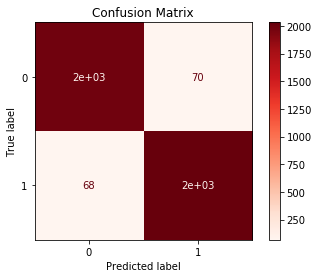

In [84]:
# Confusion matrix

# plot model's confusion matrix

print("Precision Score: %f" % (precision_score(y_test, y_pred) * 100))
plot_confusion_matrix(pac, X_test, y_test, cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()